# Charts

* Authors: Ramakrishna Reddy Loka, David Koop
* Last Updated: 2024-10-10

## Introduction

Data visualization is a field that concerns the representation and presentation of data in the visual form. Such visualizations can reveal patterns, trends, and relationships in data, and there are many important guidelines about how to best represent and communicate data. While custom visualizations can be eye-catching and memorable, there a number of standard chart types that are commonly used to visualize data. Sometimes these charts are also known as *plots* (e.g. line plots) or *graphs* (e.g. bar graphs). In this courselet, we will explore different types of charts using the pyobsplot library.


## Python Data Visualization Libraries

To begin constructing data visualizations in python, we need to select a library to use to create the visualizations. There is a sprawling [landscape](https://pyviz.org/overviews/) of visualizaiton libraries in python. One of the newest and promising libraries is [pyobsplot](https://juba.github.io/pyobsplot/), and we will use that library for this courselet. Pyobsplot is a Python interface to the Observable Plot JavaScript library, allowing to create modern, interactive visualizations using a concise and intuitive API. However, there are a number of alternatives that may be useful depending on your needs, both in terms of types of charts and options, and for eventually deploying the visualizations. Some other popular charting libraries include:

* [Matplotlib](https://matplotlib.org/): Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides a MATLAB-like interface for creating a wide variety of plots and figures. Matplotlib is highly customizable and can produce publication-quality figures in a variety of formats. It serves as the foundation for many other Python visualization libraries.

* [Plotly](https://plotly.com/python/): Plotly is a library that allows you to create interactive and dynamic visualizations that can be embedded in web applications or dashboards. It provides a range of chart types and customization options, and allows you to create animations and interactive controls. Plotly is a good choice if you need to create web-based interactive visualizations.

* [Vega-Altair](https://altair-viz.github.io/): Vega-Altair is a library that allows you to create declarative visualizations that are based on a grammar of graphics. It provides a concise and intuitive syntax for creating charts, and allows you to easily customize the look and feel of your charts. Vega-Altair is a good choice if you want to create complex visualizations using a declarative, grammar-based approach.

## Installing the required libraries

In this courselet, we will be using pyobsplot, a Python interface to the Observable Plot JavaScript library, for creating our data visualizations. In order to create charts in this courselet, it is necessary to install [pyobsplot](https://juba.github.io/pyobsplot/). To install pyobsplot, simply run the following command in your Python environment:
```sh
pip install pyobsplot
```
While pyobsplot supports building visualizations in a number of different ways, the most straightforward method is by using the `Plot` class. This is often imported as follows:

In [ ]:
from pyobsplot import Plot

## Datasets

For this courselet, we will be using the [Gapminder](https://www.gapminder.org/tools/#$chart-type=bubbles&url=v2) data as persisted by [vega-datasets](https://github.com/vega/vega-datasets). Run the next cells to download this data and parse this data locally.

In [128]:
import os
import json
from urllib.request import urlretrieve

url = "https://raw.githubusercontent.com/vega/vega-datasets/refs/heads/main/data/gapminder.json"
local_fname = "gapminder.json"
if not os.path.exists(local_fname):
    urlretrieve(url, local_fname)

In [40]:
import polars as pl
df = pl.read_json("gapminder.json")

# adding new 'region' column from 'cluster' for descriptive labels.
cluster_mapping = { 0: 'S. Asia', 1: 'Europe', 2: 'Africa', 3: 'Americas', 4: 'E. Asia & Pacific', 5: 'Mid. East'}
df = df.with_columns(pl.col("cluster").replace_strict(cluster_mapping).alias("region"))

df

year,country,cluster,pop,life_expect,fertility,region
i64,str,i64,i64,f64,f64,str
1955,"""Afghanistan""",0,7971931,43.88,7.42,"""S. Asia"""
1960,"""Afghanistan""",0,8622466,45.03,7.38,"""S. Asia"""
1965,"""Afghanistan""",0,9565147,46.13,7.35,"""S. Asia"""
1970,"""Afghanistan""",0,10752971,47.08,7.4,"""S. Asia"""
1975,"""Afghanistan""",0,12157386,47.55,7.54,"""S. Asia"""
…,…,…,…,…,…,…
1985,"""Venezuela""",3,17402304,71.56,3.79,"""Americas"""
1990,"""Venezuela""",3,19750579,72.44,3.45,"""Americas"""
1995,"""Venezuela""",3,22107286,72.61,3.08,"""Americas"""


## Line Graph

A [line chart](https://juba.github.io/pyobsplot/usage.html) is a chart that displays information as a series of data **points** connected by straight **lines**. Line charts can be used to show trends over time, and they are particularly useful for visualizing data that changes continuously. This is the default plot in matplotlib and therefore is constructed using the `plot` method. Here, we examine the life expectancy in the United States from 1955-2005. The data we start with is composed of two paired sequences, one for the years and another for the values.

In [46]:
life_expect_US_df = df.filter(pl.col('country') == 'United States')
life_expect_US_df

year,country,cluster,pop,life_expect,fertility,region
i64,str,i64,i64,f64,f64,str
1955,"""United States""",3,161136449,69.86,3.47,"""Americas"""
1960,"""United States""",3,176188578,70.06,3.58,"""Americas"""
1965,"""United States""",3,189703283,70.37,2.87,"""Americas"""
1970,"""United States""",3,200328340,70.93,2.47,"""Americas"""
1975,"""United States""",3,211274535,72.73,1.77,"""Americas"""
…,…,…,…,…,…,…
1985,"""United States""",3,235146182,74.91,1.84,"""Americas"""
1990,"""United States""",3,248083732,75.72,2.07,"""Americas"""
1995,"""United States""",3,265660556,76.08,1.97,"""Americas"""


The line chart will be generated using the **life_expect_US_df** DataFrame. Within the `Plot.lineY()` function, we can directly reference column names for data mapping. For instance, *year* and *life_expect* will be mapped to the x and y axes, respectively.

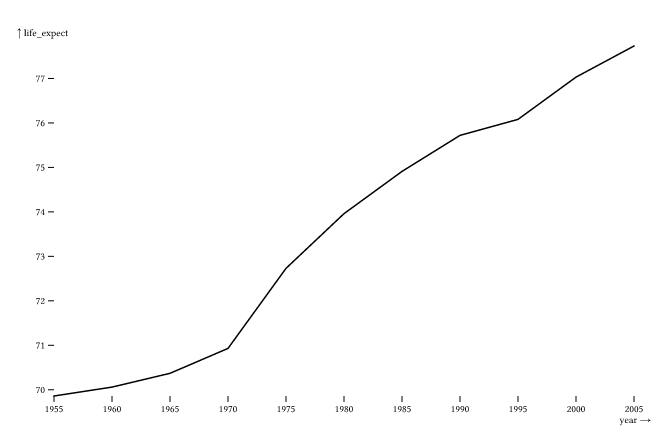

In [78]:
Plot.plot({
    "x":{
        "tickFormat": "d"
    },
    "marks": [
        Plot.lineY(life_expect_US_df, {
            "x": "year", # Map 'year' column to x-axis
            "y": "life_expect" # Map 'life_expect' column to y-axis
        })
    ]
})

A line plot places points according to an x-position (left-to-right) which in our case represents the year and according to a y-position (bottom-to-top) which in our case represents the average life expectancy in that year. Those dots are connected by straight lines so we can see the trends over time. The implication of the line segements is that the values continuously change from one measurement to another.

Besides the line segments, the plot also shows two **axes**, the x-axis and the y-axis. The axes have **labeled tick marks** that help viewers read the values for a particular location along the line. Since we already know the data we are plotting, understanding the visualization is straightforward--we see a trend of increasing life expectancy over the years. However, suppose you were just shown this graph without that background information. We might guess that the x-axis shows years, but the y-axis could be any number of different measures.

## Adding Labels

Before publishing a line plot, we should label the axes in the graph and provide a title for the visualization. Pyobsplot uses a declarative approach where we define all aspects of the plot in a single configuration. To add labels to the axes and a title to the plot, we include these elements directly in the plot configuration by using the `label` and `title` key.

To set the labels for the horizontal and vertical axes, define the `label` key within the `x` and `y` values, to set the labels for the horizontal and vertical axes respectively. We can add a title to the plot by using the `title` key at the top level of the configuration.

Additionally, you can use the `labelAnchor` key to set the position of the label to top, right, bottom, left, or center.

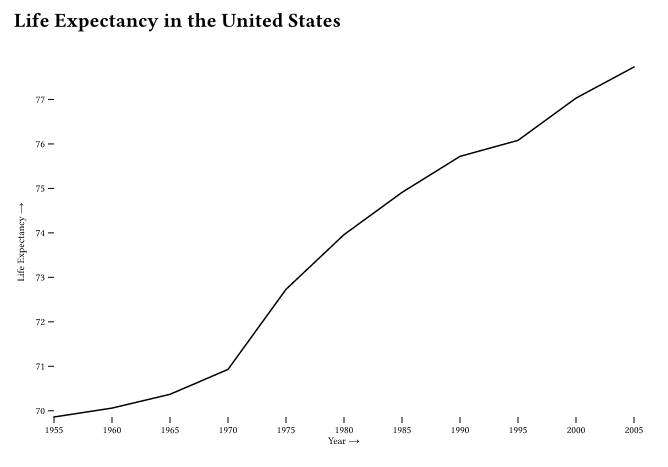

In [79]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year",
        "labelAnchor": "center"
    },
    "y":{
      "label": "Life Expectancy",
        "labelAnchor": "center"
    },
    "marks": [
        Plot.lineY(life_expect_US_df, {
            "x": "year",
            "y": "life_expect"
        })
    ]
})

## Changing Plot Appearance

You may have noted that the line is draw in a black color. That is pyobsplot default line color, but we can change it if we wish by modifying the `stroke` key.

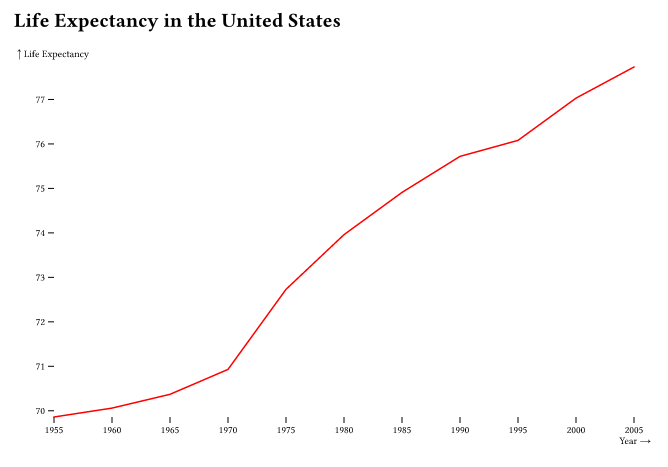

In [80]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year"
    },
    "y":{
       "label": "Life Expectancy",
    },
    "marks": [
        Plot.lineY(life_expect_US_df, {
            "x": "year",
            "y": "life_expect",
            "stroke": "red"
        })
    ]
})

Similarly, we can change the line style using the `strokeDasharray` which is used to create the dashed or dotted lines. It accepts a list of numbers representing alternating dash and gap lengths. Shorter values result in more frequent dashes or dots, while larger values create longer dashes with bigger gaps. For example, "5,5" here creates evenly spaced dashes, while "10,5" produces longer dashes with shorter gaps. The pattern repeats along the entire length of the line, allowing for a wide range of visual styles

The following code snippet changes the line style to a dashed line:

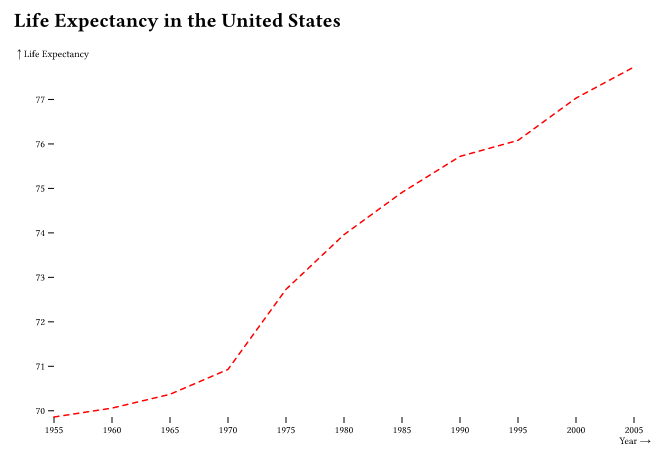

In [81]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year"
    },
    "y":{
      "label": "Life Expectancy"
    },
    "marks": [
        Plot.lineY(life_expect_US_df, {
            "x": "year",
            "y": "life_expect",
            "stroke": "red",
            "strokeDasharray": [5,5]
        })
    ]
})

Sometimes, it is useful to know the points that were used to create the line plot. This may be important in understanding how fine-grained the data is and how the values are distributed. For example, if the data had one measurement between 1955 and 1995 and ten measurements from 1995 to 2005, we may be missing subtle trends in the earlier time period. In Plot.lineY, we can change the `marker` type to emphasize the recorded points. The marker option supports arrow, arrow-reverse, circle, circle-stroke, dot, tick, tick-x, tick-y. The [documentation](https://observablehq.com/plot/features/markers#markers) provides the definitions of the available markers.

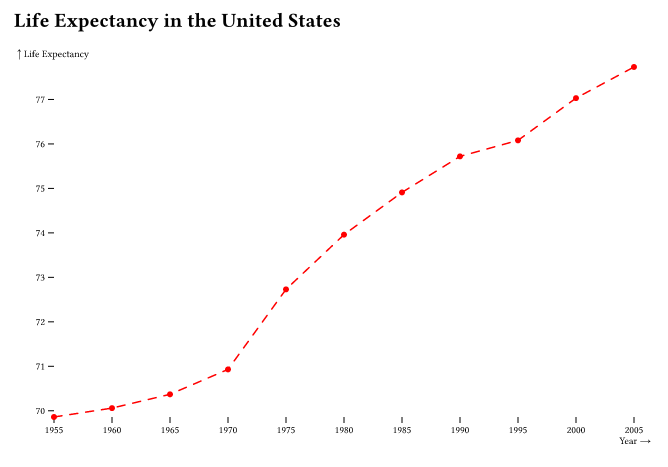

In [82]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year"
    },
    "y":{
       "label": "Life Expectancy"
    },
    "marks": [
        Plot.lineY(life_expect_US_df, {
            "x": "year",
            "y": "life_expect",
            "stroke": "red",
            "strokeDasharray": [8,8],
            "marker": "circle"
        })
    ]
})

For non-linear curves, markers may not align with the exact data positions specified by x and y, as their placement is influenced by the curve’s path segments. To ensure symbols are accurately placed at the specified x and y positions, use a [dot mark](https://juba.github.io/pyobsplot/getting_started.html) instead.

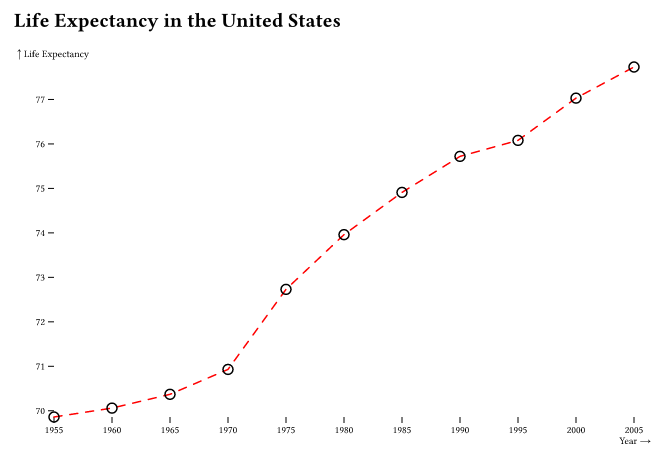

In [83]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year"
    },
    "y":{
      "label": "Life Expectancy"
    },
    "marks": [
        Plot.lineY(life_expect_US_df, {
            "x": "year",
            "y": "life_expect",
            "stroke": "red",
            "strokeDasharray": [8,8]
        }),
        Plot.dot(life_expect_US_df, {
            "x": "year",
            "y": "life_expect",
            "r": 5
        })
    ]
})

In the example above, using `Plot.dot()`, we get points as circles, by default, unfilled. We use the `r` attribute to set the radius of dot, allowing us to control the size of the dots plotted on the graph.

### Excercise

In our example plot, change the marker type to a square, and the line style to dotted line style. Finally, keep the line color red but change the marker color to the green. Use the `Plot.dot` to plot the marker. For more details, refer to [documentation](https://observablehq.com/plot/marks/dot#dot-mark) for on dot plot.

Hint: Use strokeDasharray for creating the dotted line style.

### Solutions

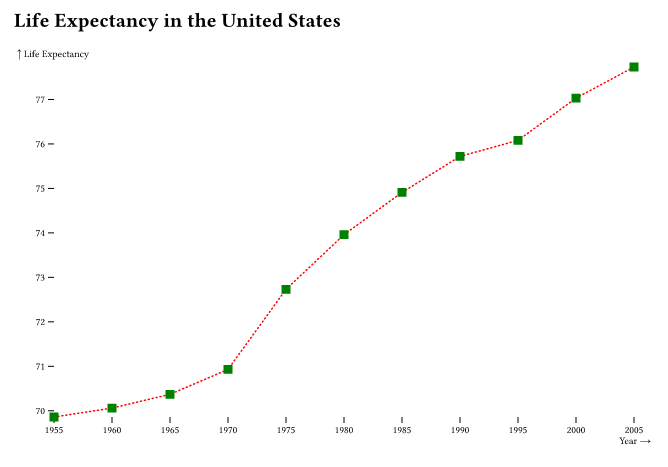

In [84]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year"
    },
    "y":{
      "label": "Life Expectancy"
    },
    "marks": [
        Plot.lineY(life_expect_US_df, {
            "x": "year",
            "y": "life_expect",
            "stroke": "red",
            "strokeDasharray": [1,3]
        }),
        Plot.dot(life_expect_US_df, {
            "x": "year",
            "y": "life_expect",
            "symbol": "square",
            "fill": "green",
            "r": 5
        })
    ]
})

### Multiple Lines

Suppose we wished to compare life expectancy across different countries. In order to do this, we need to plot multiple lines. One way of doing this is to simple add column `country` for z-axis.

In [85]:
countries = ["United States", "China", "France", "Nigeria"]
life_expect_df = df.filter(pl.col('country').is_in(countries))
life_expect_df

year,country,cluster,pop,life_expect,fertility,region
i64,str,i64,i64,f64,f64,str
1955,"""China""",4,603320147,53.92,6.16,"""E. Asia & Pacific"""
1960,"""China""",4,654170692,27.79,4.33,"""E. Asia & Pacific"""
1965,"""China""",4,723846349,58.47,6.53,"""E. Asia & Pacific"""
1970,"""China""",4,822534450,60.88,6.09,"""E. Asia & Pacific"""
1975,"""China""",4,915124661,62.81,3.57,"""E. Asia & Pacific"""
…,…,…,…,…,…,…
1985,"""United States""",3,235146182,74.91,1.84,"""Americas"""
1990,"""United States""",3,248083732,75.72,2.07,"""Americas"""
1995,"""United States""",3,265660556,76.08,1.97,"""Americas"""


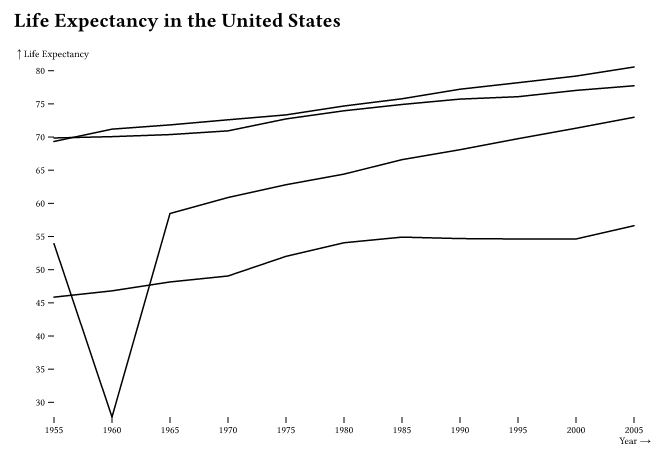

In [86]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year"
    },
    "y":{
      "label": "Life Expectancy"
    },
    "marks": [
        Plot.lineY(life_expect_df, {
            "x": "year",
            "y": "life_expect",
            "z": "country",
        })
    ]
})

This looks interesting in that there are some potentially interesting trends here.  However, we cannot identify which line represents which country in the plot. Let’s add a different color for each country. From the previous line charts, we know that the `stroke` key is used to add color to the line. Since we have multiple countries and want to add a different color for each one, we can achieve this by setting the “country” column as the value for `stroke`. Pyobsplot will then automatically assign a unique color to each country..

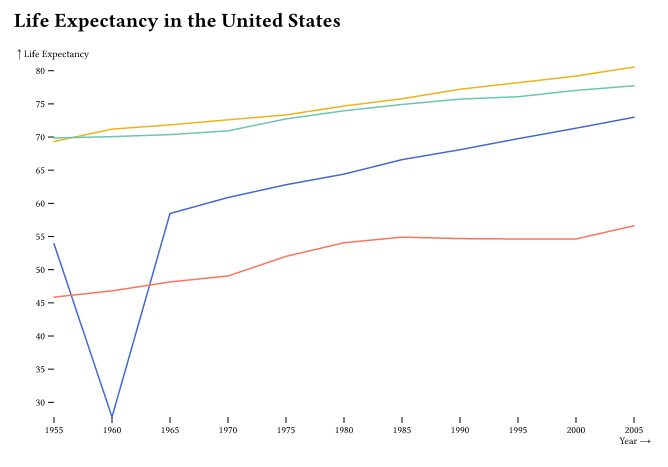

In [87]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year"
    },
    "y":{
      "label": "Life Expectancy"
    },
    "marks": [
        Plot.lineY(life_expect_df, {
            "x": "year",
            "y": "life_expect",
            "stroke": "country"
        })
    ]
})

We have dropped the `z` key because using the `stroke` key with the “country” column will automatically assign different colors to each country. This makes it easy to distinguish between the lines representing different countries without needing the `z` key.

### Legend

A **legend** provides the mapping from each color being shown to a label that helps a user understand the different lines. In our case, we want the legend to map from the color to the country name (stored in the variable `country`). To add a legend in pyobsplot, we need to use the `color`key in plot configuration. Inside the `color`, there is an option to enable the legend by setting `legend` to true. This will add legends based on the stroke key, which assigns different colors to each country.

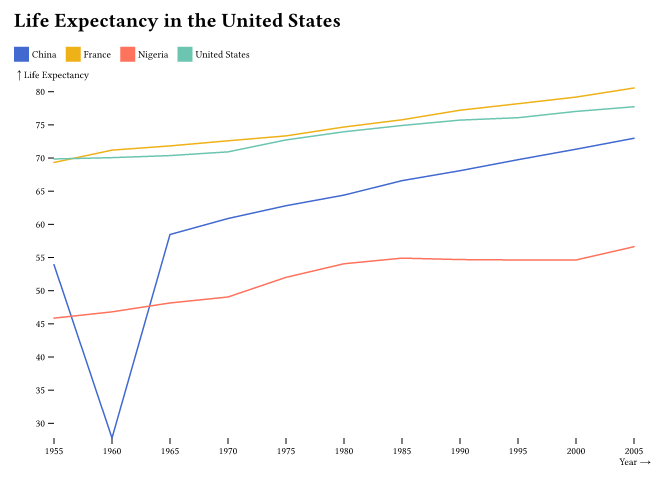

In [88]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year"
    },
    "y":{
      "label": "Life Expectancy"
    },
    "color":{
        "legend": True
    },
    "marks": [
        Plot.lineY(life_expect_df, {
            "x": "year",
            "y": "life_expect",
            "stroke": "country"
        })
    ]
})

## Scatterplots

We use `Plot.dot` for scatterplots in pyobsplot.

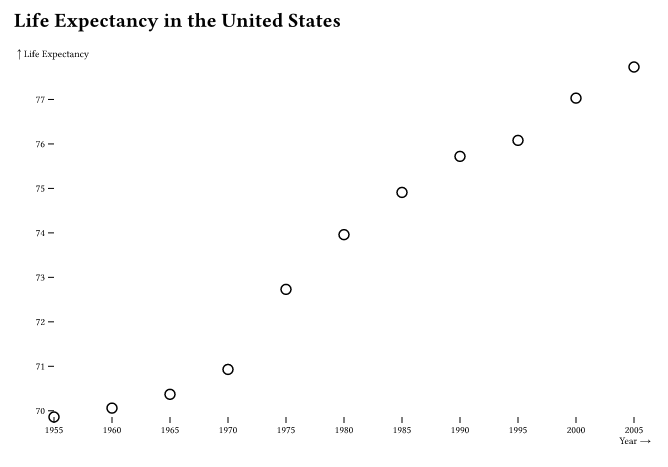

In [89]:
Plot.plot({
    "title": "Life Expectancy in the United States",
    "x":{
        "tickFormat": "d",
        "label": "Year"
    },
    "y":{
      "label": "Life Expectancy"
    },
    "marks": [
        Plot.dot(life_expect_US_df, {
            "x": "year",
            "y": "life_expect",
            "r": 5
        })
    ]
})

Technically, this is **dot plot** beacuse there is only one entry per year. If we wanted to examine life expectancy versus income for each country, we could instead produce a scatterplot as two countries might have the same values for one or both axes.

In [90]:
life_expect_2005_df = df.filter(pl.col('year') == 2005)
life_expect_2005_df

year,country,cluster,pop,life_expect,fertility,region
i64,str,i64,i64,f64,f64,str
2005,"""Afghanistan""",0,24411191,57.63,6.91,"""S. Asia"""
2005,"""Argentina""",3,39070501,75.28,2.43,"""Americas"""
2005,"""Australia""",4,20171731,81.24,1.84,"""E. Asia & Pacific"""
2005,"""Austria""",1,8227034,79.75,1.41,"""Europe"""
2005,"""Bahamas""",3,347804,73.18,2.05,"""Americas"""
…,…,…,…,…,…,…
2005,"""Switzerland""",1,7428435,81.69,1.42,"""Europe"""
2005,"""Turkey""",1,68704715,76.81,2.22,"""Europe"""
2005,"""United Kingdom""",1,60383741,79.33,1.76,"""Europe"""


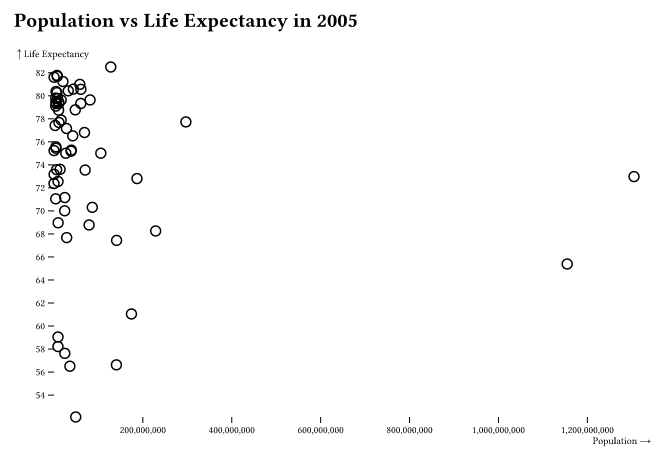

In [93]:
Plot.plot({
    "title": "Population vs Life Expectancy in 2005",
    "x":{
        "label": "Population"
    },
    "y":{
       "label": "Life Expectancy"
    },
    "marks": [
        Plot.dot(life_expect_2005_df, {
            "x": "pop",
            "y": "life_expect",
            "r": 5
        })
    ]
})

Because China and India's populations dwarfed other countries, this plot clusters most of the points on the left side. We can change this by using **log scaling** on the x-axis.

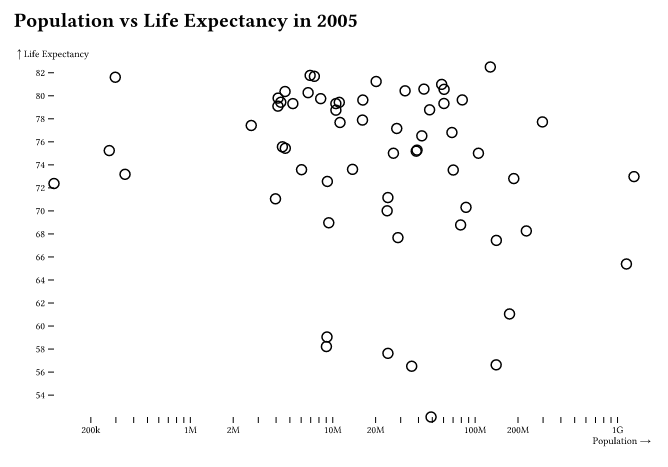

In [94]:
Plot.plot({
    "title": "Population vs Life Expectancy in 2005",
    "x":{
        "type": "log",
        "base": 10,
        "label": "Population"
    },
    "y":{
       "label": "Life Expectancy"
    },
    "marks": [
        Plot.dot(life_expect_2005_df, {
            "x": "pop",
            "y": "life_expect",
            "r": 5
        })
    ]
})

This is interesting, but we may be able to see other differences if we know something about the regions where these countries are located in. To do, we might wish to add color. We can do this by adding **region** column to the `fill`

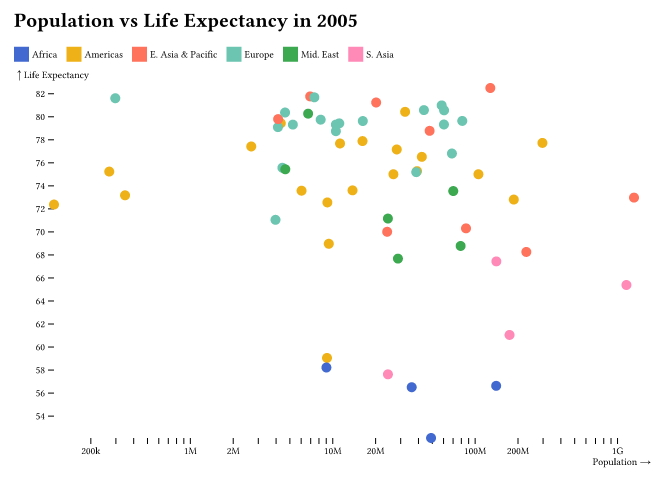

In [95]:
Plot.plot({
    "title": "Population vs Life Expectancy in 2005",
    "x":{
        "type": "log",
        "base": 10,
        "label": "Population"
    },
    "y":{
       "label": "Life Expectancy"
    },
    "color": {
        "legend": True,
        "type":"categorical",
    },
    "marks": [
        Plot.dot(life_expect_2005_df, {
            "x": "pop",
            "y": "life_expect",
            "fill": 'region',
            "r": 5
        })
    ]
})

### Size

Finally, we can enhance the visualization by incorporating fertility information through the size of the markers. We can do this by assigning fertility values to the radius, the dots' sizes will reflect these values, providing an additional layer of insight.

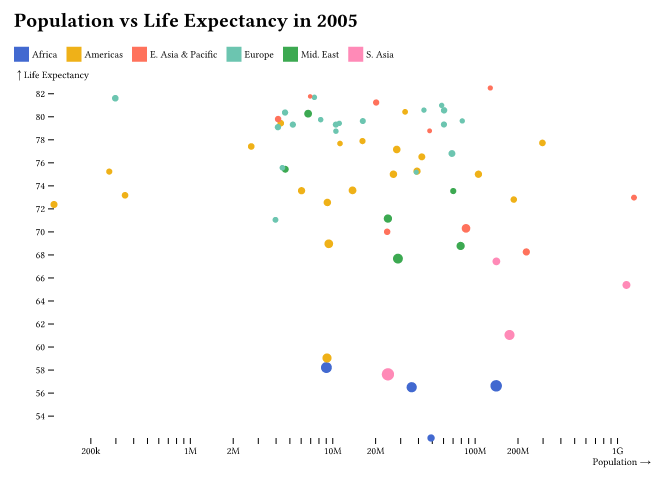

In [96]:
Plot.plot({
    "title": "Population vs Life Expectancy in 2005",
    "x":{
        "type": "log",
        "base": 10,
        "label": "Population"
    },
    "y":{
       "label": "Life Expectancy"
    },
    "color": {
        "legend": True,
        "type":"categorical"
    },
    "marks": [
        Plot.dot(life_expect_2005_df, {
            "x": "pop",
            "y": "life_expect",
            "fill": 'region',
            "r": "fertility"
        })
    ]
})

To better visualize fertility rates, we need to scale the values so viewers can easily distinguish between different rates. By adjusting the radius of the dots, we can represent lower fertility values with smaller radii and higher values with larger radii. This type of scatterplot is known as a **bubble chart**.

In pyobsplot, we can achieve this by defining the `range` inside the `r` attribute at the plot configuration level. The **range key** specifies the starting and ending values for the radius. For example, setting the range to [1, 15] means that the smallest value in the dataset will be mapped to a radius of 1 pixel, and the largest value will be mapped to a radius of 15 pixels.

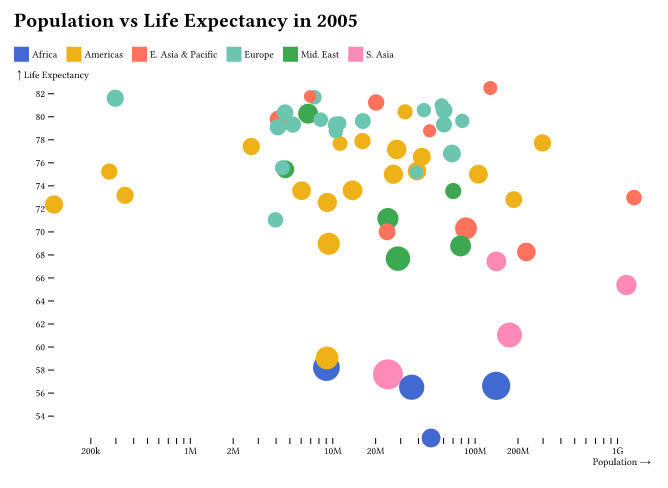

In [97]:
Plot.plot({
    "title": "Population vs Life Expectancy in 2005",
    "x":{
        "type": "log",
        "base": 10,
        "label": "Population"
    },
    "y":{
       "label": "Life Expectancy"
    },
    "color": {
        "legend": True,
        "type":"categorical"
    },
    "r": {
        "range": [1, 15]
    },
    "marks": [
        Plot.dot(life_expect_2005_df, {
            "x": "pop",
            "y": "life_expect",
            "fill": 'region',
            "r": "fertility"
        })
    ]
})

### Exercise

In some cases, relationships like correlation are clearer when we plot the correlated variables by x- and y- position. Modify the plot to plot `fertility` against `life_expect` for year 2005 using the life_expect_2005_df, and size by population. You may need to experiment to find a good scaling factor. Also, consider whether the log scale for the x-axis is a good idea.

### Solution

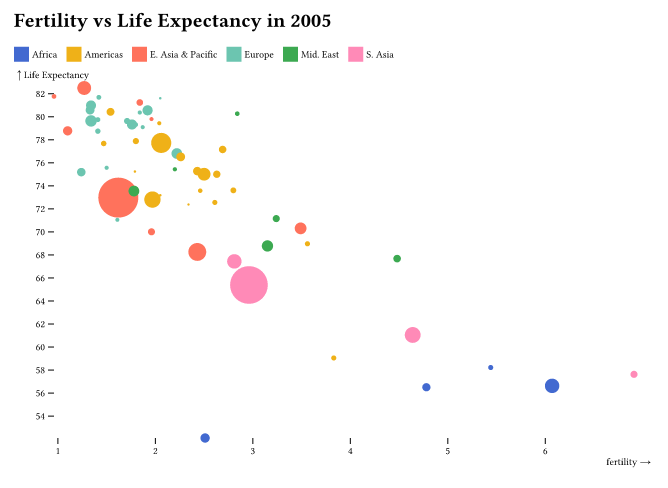

In [98]:
Plot.plot({
    "title": "Fertility vs Life Expectancy in 2005",
    "x":{
        "label": "fertility"
    },
    "y":{
      "label": "Life Expectancy"
    },
    "color": {
        "legend": True,
        "type":"categorical"
    },
    "r": {
        "range": [1, 20]
    },
    "marks": [
        Plot.dot(life_expect_2005_df, {
            "x": "fertility",
            "y": "life_expect",
            "fill": 'region',
            "r": "pop"
        })
    ]
})

### Facets

Our plots only show the data for 2005. It might be interesting to compare the scatterplots for different years, say 1960, 1975, 1990, and 2005. Here, we could create four different plots within the same visualization.

In pyobsplot, faceting is usually activated by specifying the horizontal facet channel (`fx`), the vertical facet channel (`fy`), or both for two-dimensional faceting. This allows you to create multiple subplots based on categorical variables, making it easier to compare different subsets of data.

In [99]:
facet_df = df.filter(pl.col('year').is_in([1960, 1975, 1990, 2005]))
facet_df

year,country,cluster,pop,life_expect,fertility,region
i64,str,i64,i64,f64,f64,str
1960,"""Afghanistan""",0,8622466,45.03,7.38,"""S. Asia"""
1975,"""Afghanistan""",0,12157386,47.55,7.54,"""S. Asia"""
1990,"""Afghanistan""",0,10694796,53.83,7.57,"""S. Asia"""
2005,"""Afghanistan""",0,24411191,57.63,6.91,"""S. Asia"""
1960,"""Argentina""",3,20349744,65.26,3.08,"""Americas"""
…,…,…,…,…,…,…
2005,"""United States""",3,296842670,77.73,2.06,"""Americas"""
1960,"""Venezuela""",3,8156937,65.17,6.42,"""Americas"""
1975,"""Venezuela""",3,13176387,67.6,4.69,"""Americas"""


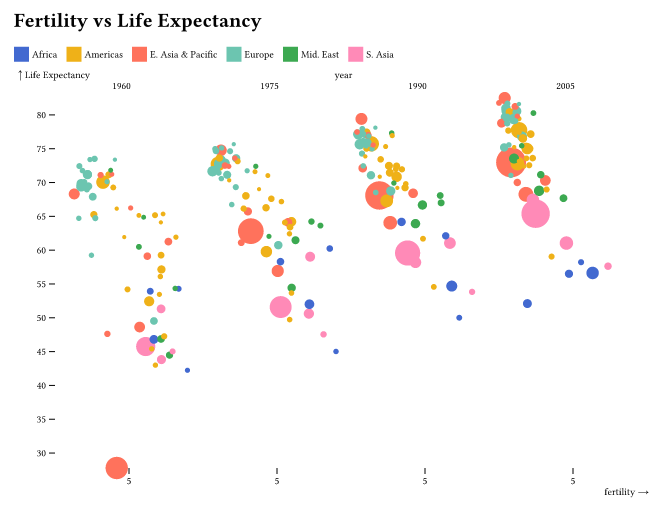

In [100]:
Plot.plot({
    "title": "Fertility vs Life Expectancy",
    "x":{
        "label": "fertility"
    },
    "y":{
       "label": "Life Expectancy"
    },
    "color": {
        "legend": True,
        "type":"categorical"
    },
    "r": {
        "range": [2, 15]
    },
    "marks": [
        Plot.dot(facet_df, {
            "x": "fertility",
            "y": "life_expect",
            "fx": "year",
            "fill": "region",
            "r": "pop"
        })
    ]
})

In this example, when we used `fx: "year"`, the plot automatically generates individual subplots for each unique year, with each subplot displaying only the data points relevant to that specific year. The plot  ensures the x-axis is band-scaled to fit all subplots side by side, while the y-axis is shared across all subplots for consistent comparison. Additionally, each subplot is labeled with its corresponding year, enhancing clarity and making it easy to interpret the data across different time periods.

The initial charts are challenging to read due to the subplots being too close to each other and lacking boundaries. Let's define the `height` and `width` to the plot and `frame` with `grid` lines which can make the chart clearer and easier to interpret,improving overall readability.

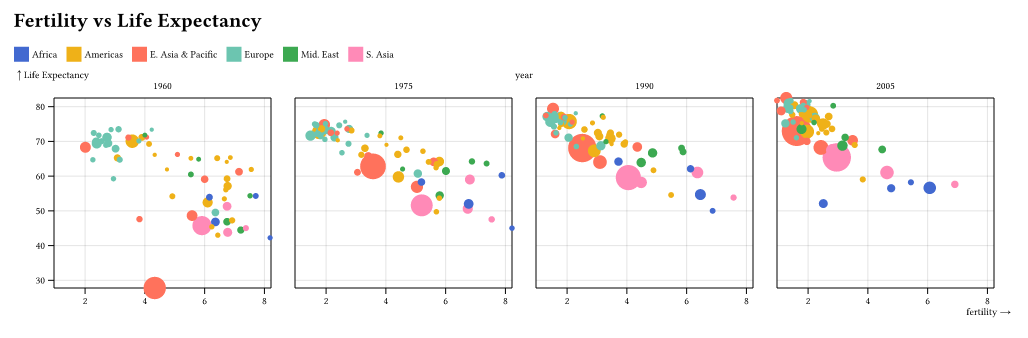

In [101]:
Plot.plot({
    "height": 250,
    "width": 1000,
    "title": "Fertility vs Life Expectancy",
    "x":{
        "label": "fertility"
    },
    "y":{
      "label": "Life Expectancy"
    },
    "color": {
        "legend": True,
        "type":"categorical"
    },
    "r": {
        "range": [2, 15]
    },
    "grid": True,
    "marks": [
        Plot.frame(),
        Plot.dot(facet_df, {
            "x": "fertility",
            "y": "life_expect",
            "fx": "year",
            "fill": "region",
            "r": "pop"
        })
    ]
})

Here we have used `Plot.frame()` to add distinct frames around each faceted subplot, clearly delineating the data for each year. Additionally, by enabling the grid feature with `"grid": true`, we overlay a reference grid within each subplot.

Let's focus on categorizing the regions into the Northern and Southern Hemispheres. Specifically, we'll group **Europe**, **the Middle East**, **the Americas**, and **East Asia & Pacific** in the Northern Hemisphere, while **Africa** and **South Asia** will be categorized in the Southern Hemisphere. We can then visualize the data to see how the plot looks. To enhance interactivity, we can incorporate JavaScript using **pyobsplot**, which enables us to embed JavaScript snippets by importing `js` and executing the code directly for dynamic filtering.

In [59]:
from pyobsplot import js

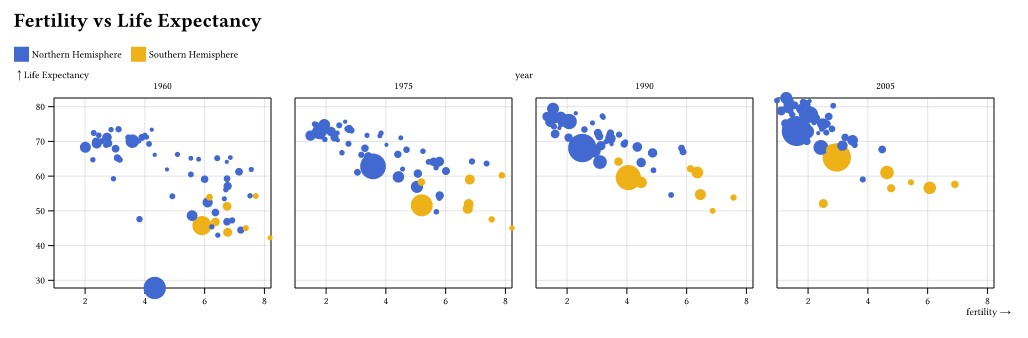

In [102]:
Plot.plot({
    "height": 250,
    "width": 1000,
    "title": "Fertility vs Life Expectancy",
    "x":{
        "label": "fertility"
    },
    "y":{
        "label": "Life Expectancy"
    },
    "color": {
        "legend": True,
        "type":"categorical"
    },
    "r": {
        "range": [2, 15]
    },
    "grid": True,
    "marks": [
        Plot.frame(),
        Plot.dot(facet_df, {
            "x": "fertility",
            "y": "life_expect",
            "fx": "year",
            "fill": js(
                "d => ['Americas', 'E. Asia & Pacific', 'Europe', 'Mid. East'].includes(d.region) ? 'Northern Hemisphere': 'Southern Hemisphere'"
                ),
            "r": "pop",
        })
    ]
})

## Bar Chart

A **bar chart** is a chart that uses bars to represent values. The bars can be horizontal or vertical, and the length of each bar encodes the value. Bar charts are commonly used to compare different categories. Here, we have a list of countries and their populations in 2005:

In [103]:
bar_countries = ['Australia', 'China', 'France', 'India', 'Nigeria', 'United States']
bar_countries_2005_df= df.filter((pl.col('year') == 2005) & pl.col('country').is_in(bar_countries))
bar_countries_2005_df

year,country,cluster,pop,life_expect,fertility,region
i64,str,i64,i64,f64,f64,str
2005,"""Australia""",4,20171731,81.24,1.84,"""E. Asia & Pacific"""
2005,"""China""",4,1304887562,72.98,1.62,"""E. Asia & Pacific"""
2005,"""France""",1,60510079,80.56,1.92,"""Europe"""
2005,"""India""",0,1154638713,65.39,2.96,"""S. Asia"""
2005,"""Nigeria""",2,140490722,56.63,6.07,"""Africa"""
2005,"""United States""",3,296842670,77.73,2.06,"""Americas"""


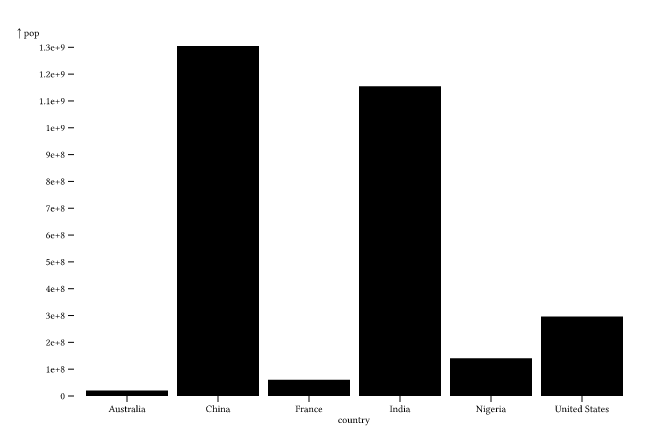

In [105]:
Plot.plot({
    "y" : {"tickFormat": ".2"},
    "marginLeft": 60,
    "marks": [
        Plot.barY(bar_countries_2005_df, {
            "x": "country",
            "y": "pop"
        })
    ]
})

As with other charts, a title for the plot and labels for the axes are important, and we can add these as with the other plots.

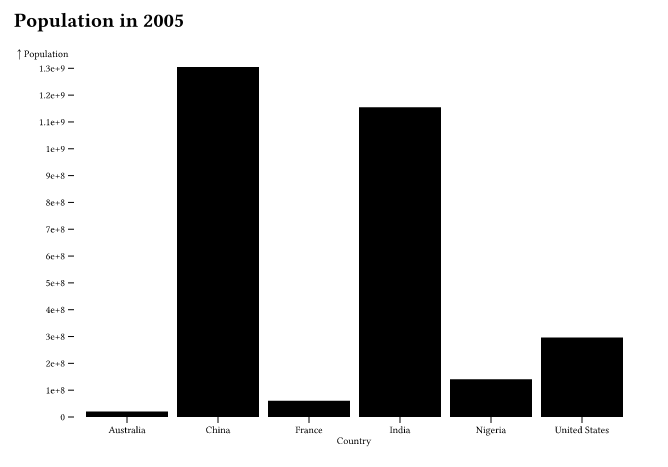

In [106]:
Plot.plot({
    "title": "Population in 2005",
    "marginLeft": 60,
    "x":{
        "label": "Country"
    },
    "y":{
        "tickFormat": ".2",
        "label": "Population"
    },
    "marks": [
        Plot.barY(bar_countries_2005_df, {
            "x": "country",
            "y": "pop"
        })
    ]
})

We can also create a horizontal bar chart by using the `bar` function in place of the `bar` function.

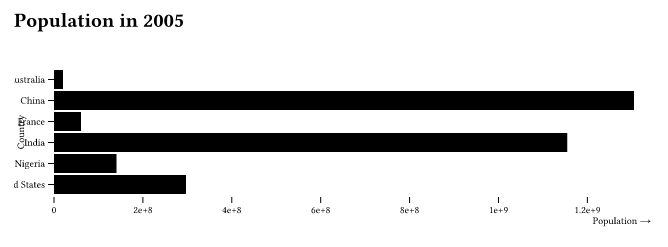

In [107]:
Plot.plot({
    "title": "Population in 2005",
    "x":{
        "label": "Population",
        "tickFormat": ".2"
    },
    "y":{
        "label": "Country"
    },
    "marks": [
        Plot.barX(bar_countries_2005_df, {
            "x": "pop",
            "y": "country",
        })
    ]
})

In above plot, we see that the labels on vertical axes are overlapped with axis label name and also labels are not compeletly displayed. In order to overcome such issue we can use margins. **Margins** in a plot are the spaces around the plotting area that provide room for axis labels, titles, and other annotations.Margins are typically specified in pixels. Adjusting margins can help prevent overlapping of labels and ensure that all elements of the plot are clearly visible.

In the pyobsplot we have `marginLeft`, `marginRight`, `marginTop` and `marginBottom`. In these scenario let's use marginLeft.

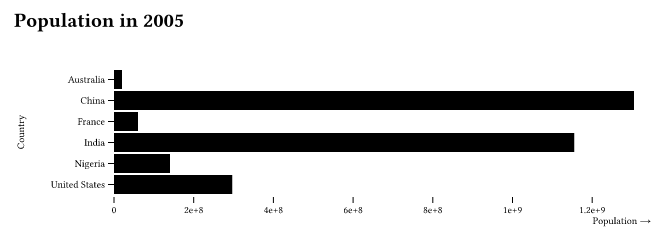

In [110]:
Plot.plot({
    "title": "Population in 2005",
    "marginLeft": 100,
    "x":{
        "label": "Population",
        "tickFormat": ".2"
    },
    "y":{
        "label": "Country"
    },
    "marks": [
        Plot.barX(bar_countries_2005_df, {
            "x": "pop",
            "y": "country",
        })
    ]
}, format="png")

These countries are currently shown in alphabetical order which can be useful for looking up a particular country's population, especially if there are many countries. However, we could also sort the bars by their population which makes comparing the values easier.

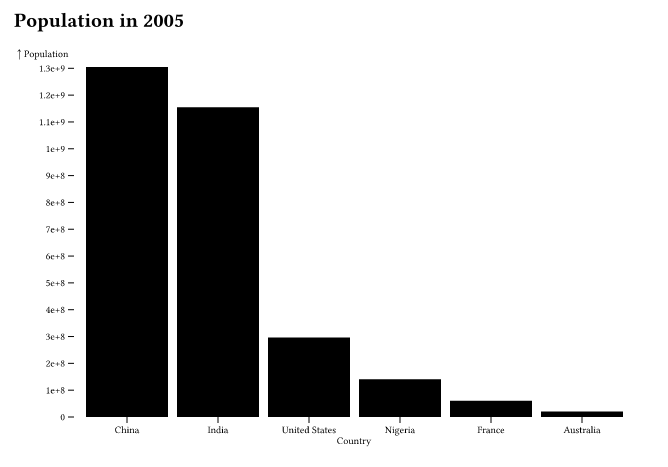

In [111]:
Plot.plot({
    "title": "Population in 2005",
    "marginLeft": 60,
    "x":{
        "label": "Country"
    },
    "y":{
        "label": "Population",
        "tickFormat": ".2"
    },
    "marks": [
        Plot.barY(bar_countries_2005_df, {
            "x": "country",
            "y": "pop",
            "sort": {"x": "-y"},  # This ensures the sorting is applied to the bars
        })
    ]
})

In above example, we used the `"sort": {"x": "-y"}` option in the plot. The `sort` key specifies sorting method and `{"x": "-y"}` defines the sorting criteria. Here `x` indicates that we want to sort the x-axis values and `-y` indicates that we want to sort the y-axis values and the minus sign (-) before "y" means we want to sort in descending order based on the y-values.

### Changing the Appearance

As with other plots, we can change the appearance of the bars using different parameters, including one to change the color of the bars.

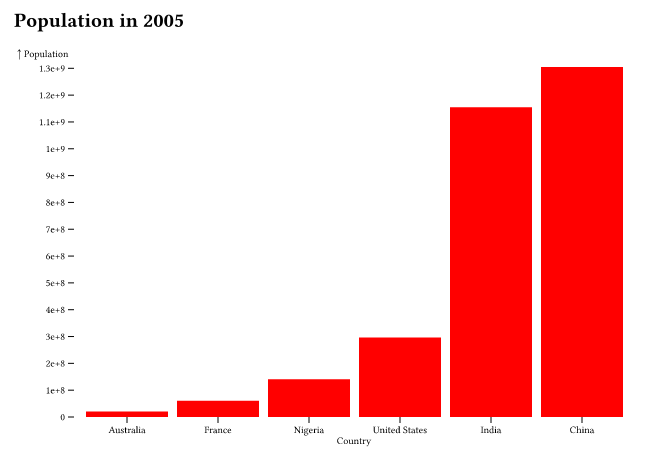

In [112]:
Plot.plot({
    "title": "Population in 2005",
    "marginLeft": 60,
    "x":{
        "label": "Country"
    },
    "y":{
        "label": "Population",
        "tickFormat": ".2"
    },
    "marks": [
        Plot.barY(bar_countries_2005_df, {
            "x": "country",
            "y": "pop",
            "fill": "red",
            "sort": {"x": "y"}
        })
    ]
})

Let's enable grid lines and add frame for the above plot

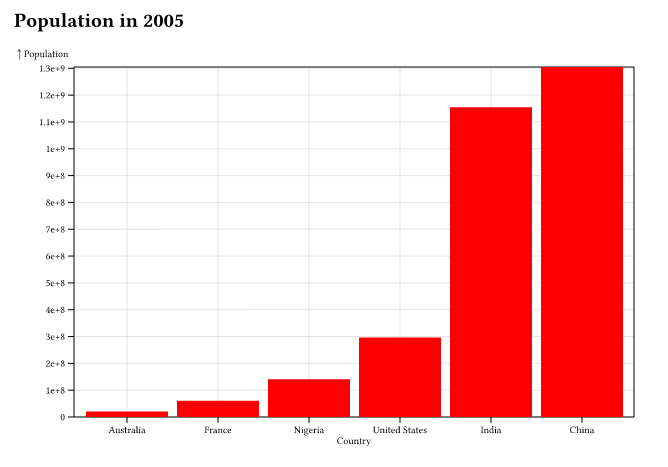

In [114]:
Plot.plot({
    "title": "Population in 2005",
    "marginLeft": 60,
    "x":{
        "label": "Country"
    },
    "y":{
        "label": "Population",
        "tickFormat": ".2"
    },
    "grid": True,
    "marks": [
        Plot.frame(),
        Plot.barY(bar_countries_2005_df, {
            "x": "country",
            "y": "pop",
            "fill": "red",
            "sort": {"x": "y"}
        })
    ]
})

While default grid lines can provide a useful visual reference, there are situations where we want more control over their placement. That's where `Plot.ruleX` and `Plot.ruleY` come in. These functions allows to draw horizontal and vertical lines at specific ticks on the x and y axes, respectively.

By using `Plot.ruleX` and `Plot.ruleY`, we can emphasize key data points or thresholds, create custom grid lines tailored to the data or enhance chart readability and visual appeal.

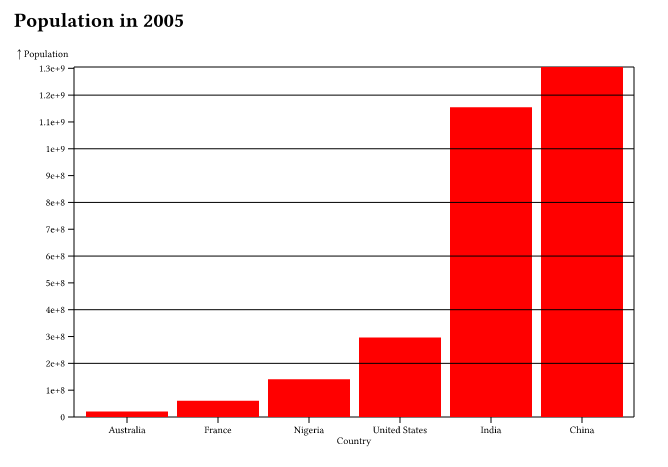

In [116]:
Plot.plot({
    "title": "Population in 2005",
    "marginLeft": 60,
    "x":{
        "label": "Country"
    },
    "y":{
        "label": "Population",
        "tickFormat": ".2"
    },
    "marks": [
        Plot.frame(),
        Plot.barY(bar_countries_2005_df, {
            "x": "country",
            "y": "pop",
            "fill": "red",
            "sort": {"x": "y"}
        }),
        Plot.ruleY([2e+8, 4e+8, 6e+8, 8e+8, 1e+9, 1.2e+9]),
    ]
})

In some cases, these lines may be distracting. We could choose to use a white color so that they fade into the background but "cut" the bars to help with value judgments. We can achieve this using `stroke` and `strokeWidth` attributes in `Plot.ruleY()` to set the color and width of the lines.

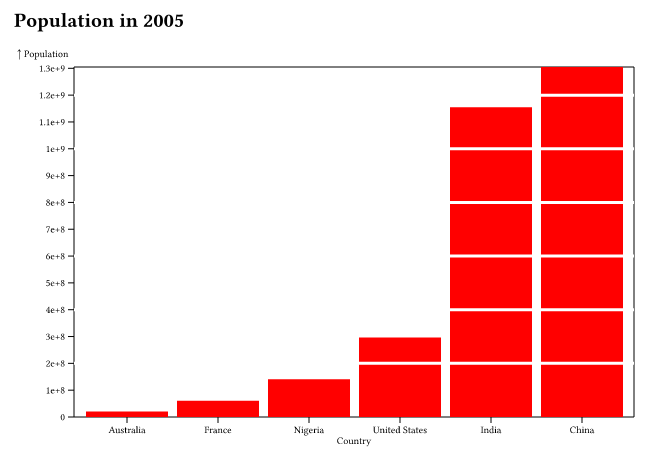

In [118]:
Plot.plot({
    "title": "Population in 2005",
    "marginLeft": 60,
    "x":{
        "label": "Country"
    },
    "y":{
        "label": "Population",
        "tickFormat": ".2"
    },
    "marks": [
        Plot.frame(),
        Plot.barY(bar_countries_2005_df, {
            "x": "country",
            "y": "pop",
            "fill": "red",
            "sort": {"x": "y"}
        }),
        Plot.ruleY([2e+8, 4e+8, 6e+8, 8e+8, 1e+9, 1.2e+9], {"stroke": "white", "strokeWidth": 3}),
    ]
})

### Stacked Bar Charts

If we wish to observe both how the population grew over the decades as well as the individual populations of each country, we can use a **stacked bar chart**. This splits each bar into individual segments corresponding to the individual values that sum to the total.

In [119]:
stacked_bar_df = df.filter(pl.col('country').is_in(bar_countries))

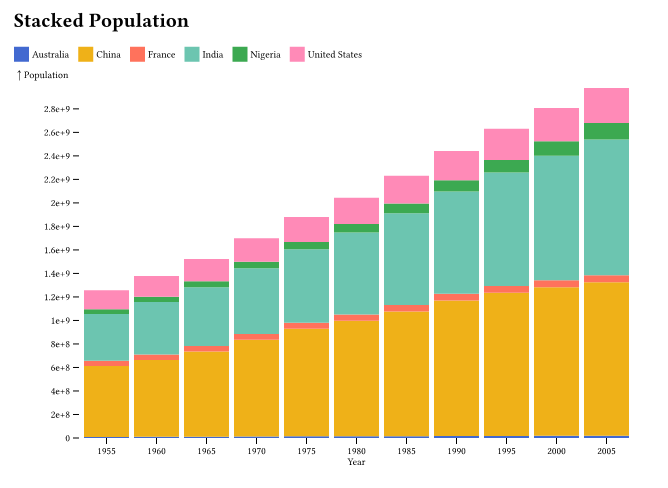

In [120]:
Plot.plot({
    "title": "Stacked Population",
    "marginLeft": 65,
    "x":{
        "label": "Year"
    },
    "y":{
        "label": "Population",
        "tickFormat": ".2"
    },
    "color": {"legend": True},
    "marks": [
        Plot.barY(stacked_bar_df, {
            "x": "year",
            "y": "pop",
            "fill": 'country'
        })
    ]
})

The `fill` property in the Plot.barY function specifies the color of the bars based on a categorical variable. In this case, `fill:'country'` means that each bar will be colored according to the country it represents. Also the `fill` property ensures that each segment (representing a country’s population) is colored differently, allowing for easy identification and comparison.

### Grouped Bar Charts

Instead of stacking, a grouped bar chart order places all bars next to each but groups them to allow better intra-group comparisons. For example, it may not be clear in the stacked bar chart whether France or Nigeria has a greater population in the 1970s, but if we place them next to each other, we can more easily see this.

In [122]:
grouped_bar_df = df.filter(pl.col('country').is_in(bar_countries) & pl.col('year').is_in([1955, 1970, 1985, 2000]))

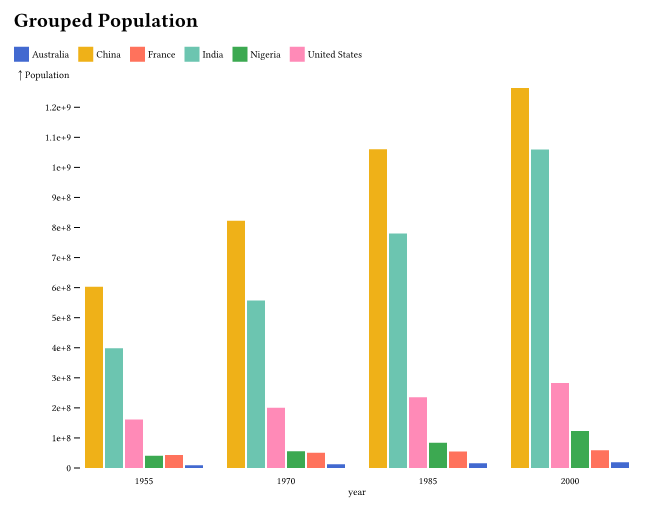

In [123]:
Plot.plot({
  "title": "Grouped Population",
  "marginLeft": 65,
   "x":{
       "axis": None
   },
   "y":{
        "label": "Population",
        "tickFormat": ".2"
   },
   "color": {"legend": True},
   "marks": [
        Plot.barY(grouped_bar_df, {
            "x": "country",
            "fx": "year",
            "y": "pop",
            "fill": "country",
            "sort": {"x" : "-y"}
        })
    ]
})

In the above example:
* fx: The `fx` property is set to year, which facets the plot by year. This means we will get separate groups of bars for each year, side by side.
* x: The `x` property is set to country, which means the bars will be grouped by country along the x-axis.
* y: The `y` property is used to set the height of the bars based on the population.
* fill: The `fill` property is used to color the bars based on the country variable. This means each country’s bars will have a distinct color, making it easier to differentiate between them.

## Choosing the Right Chart

As noted in the above example, a key challenge in visualization is finding the correct type of chart to use for a particular question about the data. There are guidelines that you can follow to select charts that can help in a particular situation. Before we examine the chart types, we need to understand the types of data attributes that are involved. These types relate to whether the data can be ordered and if so, whether those values can be compared arithmetically.

#### Data Attribute Types

- **Categorical** (aka Nominal): Attributes that represent different groups. Such attributes cannot be ordered in a meaningful way. Examples include produce types (apples, bananas, grapes) and eye color (blue, brown, green). We can tell if two data items have the same or different values for that attribute but we cannot say that one attribute is less than or greater than the other.
- **Ordinal**: Attributes that can be ordered in a meaningful way. Examples include clothing sizes (Small, Medium, Large) or customer satisfaction ratings (poor, fair, good, excellent). We can put data items in an order based on this attribute but need not be able to compute how much different two values are (small < medium but we don't know by how much).
- **Quantitative**: Attributes that are ordered and can be arithmetically compared. Here, we can measure how much smaller one value is than another or how many times larger a value is than another. Examples here include temperature readings (34.5, 54.1, 87.9) and dates (2020-03-04, 2022-05-06, 2024-07-04).

Note than a quantitative attribute is ordered and an ordered attribute could be treated categorically, but we cannot invert these relationships. Something that is strictly categorical is not ordered.

#### Chart Requirements

- **Line Chart**: A line chart requires a quantitative attribute and an ordered attribute. The connection between two points implies a trend between them, and this does not make sense for categorical values. For example, we don't talk about a trend from an apple to a banana.
- **Scatterplot**: A scatterplot requires two quantitative attributes. One value is mapped to the x-axis and the other to the y-axis. Scatterplots are useful to look for correlation (either positive or negative) between two quantiative attributes.
- **Bar Chart**: A bar chart requires a quantitative attribute and a categorical attribute. Since there is no connection between items, the categorical attribute is ok here where it wasn't for the line chart.

## Excercises

Suppose you have the penguins dataset and wish to answer some questions about the data. Create visualizations that will help you answer the following questions. Remember to choose a chart type that works with the data attributes you need to examine.

1. Is there a correlation between beak length and beak depth?
2. Can we use beak length and beak depth to distinguish between the three different species of penguins?
3. What are the differences in the average body masses of each sex of penguin on each island?


In [124]:
import os
import json
from urllib.request import urlretrieve

url = "https://raw.githubusercontent.com/vega/vega-datasets/main/data/penguins.json"
local_fname = "penguins.json"
if not os.path.exists(local_fname):
    urlretrieve(url, local_fname)

In [131]:
penguins_df = pl.read_json("penguins.json")
penguins_df

Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
str,str,f64,f64,i64,i64,str
"""Adelie""","""Torgersen""",39.1,18.7,181,3750,"""MALE"""
"""Adelie""","""Torgersen""",39.5,17.4,186,3800,"""FEMALE"""
"""Adelie""","""Torgersen""",40.3,18.0,195,3250,"""FEMALE"""
"""Adelie""","""Torgersen""",null,null,null,null,null
"""Adelie""","""Torgersen""",36.7,19.3,193,3450,"""FEMALE"""
…,…,…,…,…,…,…
"""Gentoo""","""Biscoe""",null,null,null,null,null
"""Gentoo""","""Biscoe""",46.8,14.3,215,4850,"""FEMALE"""
"""Gentoo""","""Biscoe""",50.4,15.7,222,5750,"""MALE"""


### Solutions

##### Solution 1

Scatterplots work well for correlation and both beak length and beak depth are quantitative.

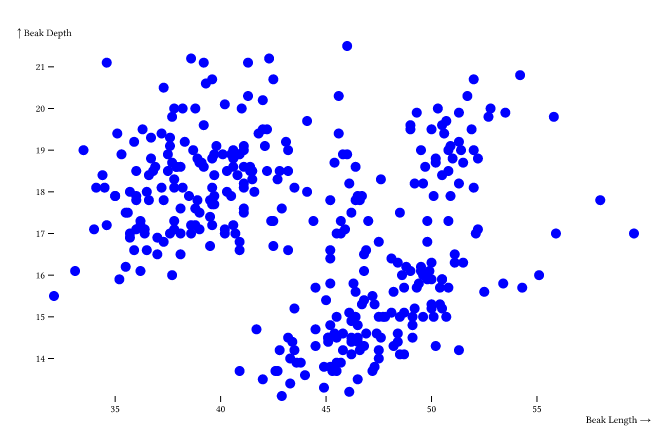

In [132]:
Plot.plot({
    "x":{
        "label": "Beak Length"
    },
    "y":{
        "label": "Beak Depth"
    },
    "marks": [
        Plot.dot(penguins_df, {
            "x": "Beak Length (mm)",
            "y": "Beak Depth (mm)",
            "fill": "blue",
            "r": 5

        })
    ]
})

We can see that there is no noticeable positive or negative correlation between these measures.

##### Solution 2

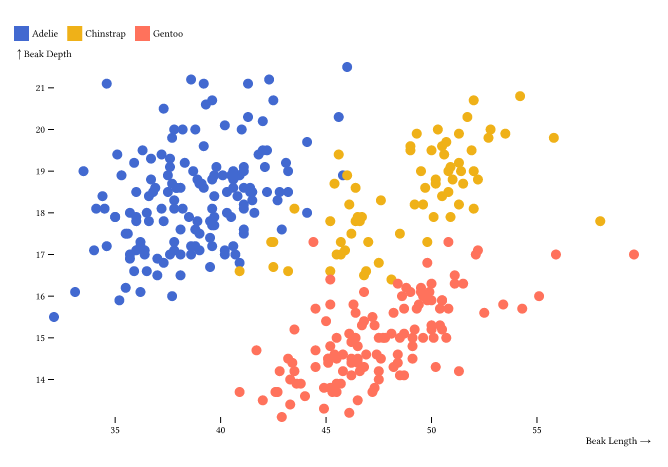

In [135]:
Plot.plot({
    "x":{
        "label": "Beak Length"
    },
    "y":{
        "label": "Beak Depth"
    },
    "color": {"legend": True},
    "marks": [
        Plot.dot(penguins_df, {
            "x": "Beak Length (mm)",
            "y": "Beak Depth (mm)",
            "fill": "Species",
            "r": 5

        })
    ]
})

We can see that these features do a pretty good job of defining three clusters, one for each species of penguin.

##### Solution 3

Both island and sex are categorical variables so we are left with bar charts. A grouped bar chart would work well here as it allows comparisons across islands and sexes at the same time.

In [136]:
mass = (
            penguins_df.filter(pl.col("Sex").is_in(["MALE", "FEMALE"]))
    .group_by("Island", "Sex")
    .agg(pl.col("Body Mass (g)").mean())
)
mass

Island,Sex,Body Mass (g)
str,str,f64
"""Torgersen""","""FEMALE""",3395.833333
"""Dream""","""MALE""",3987.096774
"""Dream""","""FEMALE""",3446.311475
"""Torgersen""","""MALE""",4034.782609
"""Biscoe""","""MALE""",5104.518072
"""Biscoe""","""FEMALE""",4319.375


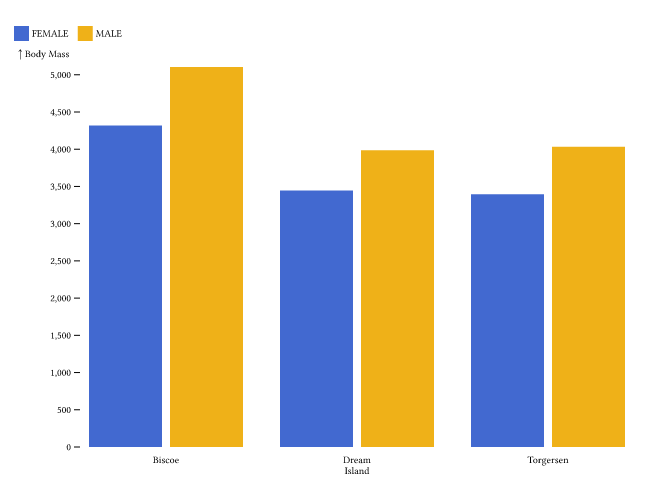

In [137]:
Plot.plot({
    "marginLeft": 65,
    "x":{
        "axis": None
    },
    "y":{
        "label": "Body Mass"
    },
    "color": {"legend": True},
    "marks": [
        Plot.barY(mass, {
            "x": "Sex",
            "y": "Body Mass (g)",
            "fx": "Island",
            "fill": "Sex"
        })
    ]
})

We can see that male penguins have more mass than female penguins on average, and that Biscoe tends to have larger penguins than the other two islands.